In [141]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df_skill = pd.read_csv("skill_level.csv", index_col=0)
df_skill

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6
F,6,6,9,9,8
G,3,2,5,6,4
H,10,9,9,8,10
I,5,4,8,5,7
J,2,2,4,3,2


In [143]:
from sklearn.decomposition import PCA
model_dim = PCA(n_components=2)
vecs_list = model_dim.fit_transform(df_skill)
vecs_list

array([[ 3.54540932,  2.87737299],
       [-6.6988638 , -0.65033509],
       [-0.16494841, -1.22336675],
       [ 3.94480771,  3.08691447],
       [ 1.36177017, -6.27925406],
       [ 2.66043708,  2.67667561],
       [-5.20580234,  1.03255023],
       [ 6.95188276, -0.32590835],
       [-1.13081783,  1.09025207],
       [-7.96087192, -1.15843017],
       [-2.1553897 ,  1.79230952],
       [ 5.12151644, -2.50609836],
       [-2.72265636,  0.06253482],
       [-1.60087574,  1.24847108],
       [ 4.05440262, -1.72368801]])

In [144]:
model_dim.explained_variance_ratio_

array([0.71235597, 0.21434312])

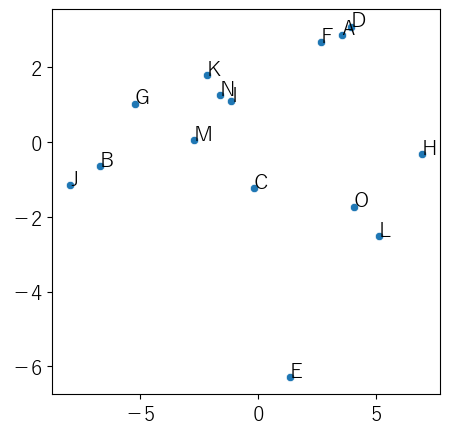

In [145]:
X=vecs_list[:,0]
Y=vecs_list[:,1]

plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 5))

sns.scatterplot(x=X,y=Y)
for i, (pointname_x, pointname_y) in enumerate(zip(X, Y)):
    plt.annotate(df_skill.index[i], xy=(pointname_x, pointname_y))

In [146]:
df_skill.sum(axis=1).sort_values()

J    13
B    16
G    20
M    25
K    27
N    28
I    29
C    30
E    31
F    38
O    39
A    40
L    41
D    41
H    46
dtype: int64

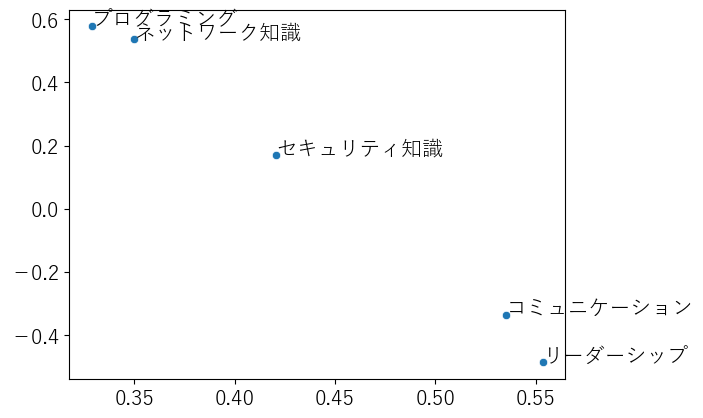

In [147]:
X_comp, Y_comp = model_dim.components_

sns.scatterplot(x=X_comp, y=Y_comp)
for i, (pointname_x, pointname_y) in enumerate(zip(X_comp, Y_comp)):
    plt.annotate(df_skill.columns[i], xy=(pointname_x, pointname_y))

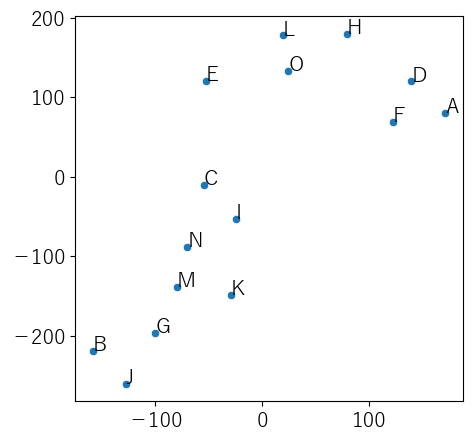

In [148]:
#import umap.umap_ as umap
from sklearn.manifold import TSNE
from scipy.sparse.csgraph import connected_components

model_dim = TSNE(n_components=2, perplexity=5)
tsne_result = model_dim.fit_transform(df_skill)

X=tsne_result[:,0]
Y=tsne_result[:,1]

plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 5))

sns.scatterplot(x=X,y=Y)
for i, (pointname_x, pointname_y) in enumerate(zip(X, Y)):
    plt.annotate(df_skill.index[i], xy=(pointname_x, pointname_y))

In [149]:
#クラスタリング
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

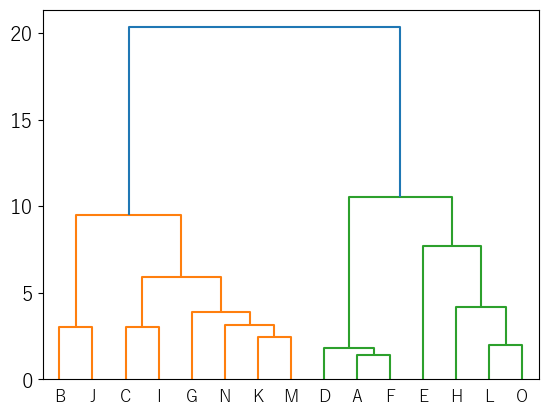

In [150]:
linkage_result = linkage(df_skill, method="ward") #single, complete, averageも
dendrogram(linkage_result, labels=df_skill.index)
plt.show()

In [151]:
#Kmeansで非階層クラスタリング
from sklearn.cluster import KMeans

vec = KMeans(n_clusters=4)
group_num = vec.fit_predict(df_skill)

In [152]:
df_skill2 = df_skill.copy()
df_skill2["グループ名"] = group_num
df_skill2.groupby("グループ名").mean()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
グループ名,,,,,
0,5.000000,4.00,6.200000,6.200000,6.400000
1,6.666667,6.00,9.333333,9.333333,8.333333
2,9.000000,9.25,6.250000,6.750000,8.000000
3,2.333333,2.00,4.333333,4.000000,3.666667


<Axes: >

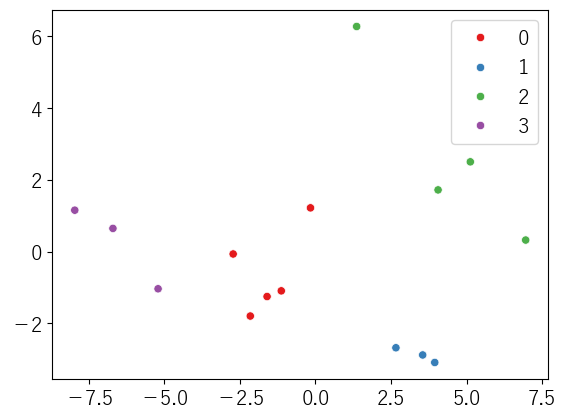

In [153]:
#次元削減してグラフ化
PCAresult = PCA(n_components=2)
vecs_list= PCAresult.fit_transform(df_skill)
X= vecs_list[:,0]
Y= vecs_list[:,1]*-1

sns.scatterplot(x=X,y=Y, hue=group_num, 
                palette="Set1")

In [154]:
from sklearn.decomposition import TruncatedSVD
SVDresult = TruncatedSVD(n_components=2)
vecs_list= SVDresult.fit_transform(df_skill)
df_skill2["SVD_X"]= vecs_list[:,0]
df_skill2["SVD_Y"]= vecs_list[:,1]
df_skill2.head()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識,グループ名,SVD_X,SVD_Y
A,7,6,9,10,8,1,18.011336,-2.089600
B,2,2,4,3,5,3,7.277623,-1.348503
C,7,5,6,5,7,0,13.433608,0.887195
D,7,6,10,9,9,1,18.482640,-2.209470
E,9,9,3,4,6,2,13.578064,6.187699


<Axes: xlabel='SVD_X', ylabel='SVD_Y'>

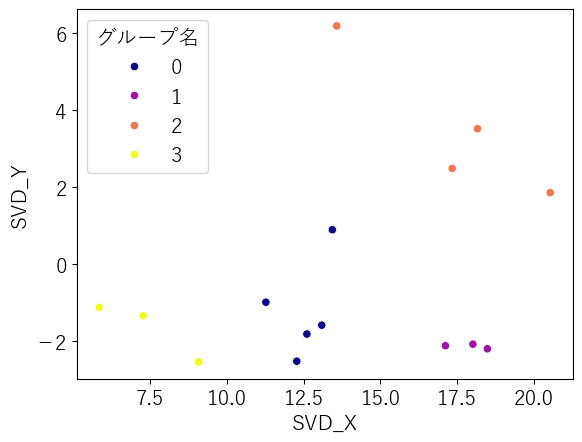

In [155]:
sns.scatterplot(data=df_skill2, 
                x="SVD_X",y="SVD_Y", hue="グループ名",
                palette="plasma")

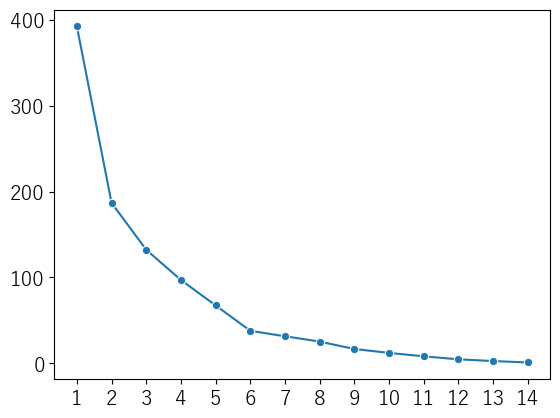

In [156]:
#エルボー法でクラスタ数を最適化
SSE = []
for i in range(1, df_skill.shape[0]):
    km = KMeans(n_clusters=i)
    km.fit(df_skill)
    SSE.append(km.inertia_)

sns.lineplot(x=range(1, df_skill.shape[0]), y=SSE, 
             marker="o",)
plt.xticks(range(1, len(SSE) + 1))
plt.show()


In [157]:
#ランダムデータつくる
random_data = []
for i in range(4):
    tmp = np.random.randint(0+50*i,50+50*i, (100,2))
    random_data.append(tmp)
random_data = np.vstack(random_data)
df_rand = pd.DataFrame(random_data, columns=["X", "Y"])
df_rand.head()

,X,Y
0,22,7
1,41,39
2,8,7
3,34,27
4,3,38


<Axes: xlabel='X', ylabel='Y'>

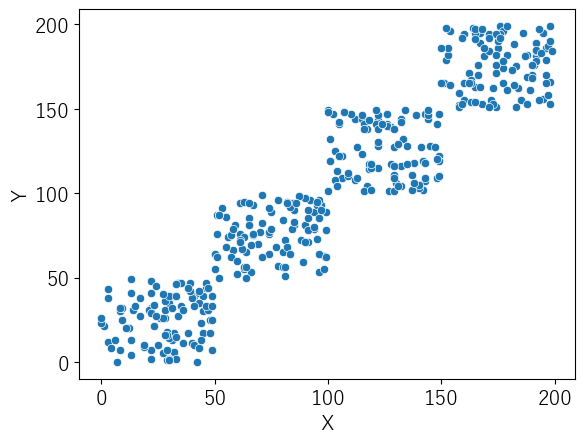

In [158]:
sns.scatterplot(data=df_rand, x="X", y="Y")

In [159]:
df_sales = pd.read_csv("fruits_sales.csv", index_col="名前")
df_sales.head()

,りんご,みかん,すいか,メロン,もも,バナナ,なし
名前,,,,,,,
Aさん,○,○,NaN,NaN,○,NaN,NaN
Bさん,NaN,○,NaN,○,NaN,NaN,NaN
Cさん,NaN,NaN,○,NaN,○,○,○
Dさん,NaN,○,NaN,○,NaN,○,NaN
Eさん,○,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
df_sales= df_sales.fillna(False).replace("○",True)
df_sales.head()

C:\Users\kawam\AppData\Local\Temp\ipykernel_3424\141562303.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sales= df_sales.fillna(False).replace("○",True)


,りんご,みかん,すいか,メロン,もも,バナナ,なし
名前,,,,,,,
Aさん,True,True,False,False,True,False,False
Bさん,False,True,False,True,False,False,False
Cさん,False,False,True,False,True,True,True
Dさん,False,True,False,True,False,True,False
Eさん,True,False,False,False,False,False,False


In [167]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

freq_items = apriori(df_sales, min_support=0.1, use_colnames=True)
freq_items.head(10) #itemsetsはfrozenset型

,support,itemsets
0,0.538462,(りんご)
1,0.384615,(みかん)
2,0.307692,(すいか)
3,0.269231,(メロン)
4,0.346154,(もも)
5,0.307692,(バナナ)
6,0.346154,(なし)
7,0.192308,"(りんご, みかん)"
8,0.153846,"(すいか, りんご)"
9,0.192308,"(もも, りんご)"


In [179]:
freq_items_top = association_rules(freq_items, metric="confidence", min_threshold=0.5, num_itemsets=1)[:14]
freq_items_top
#support支持度=出現率, confidence信頼度=条件付確率、期待値, liftリフト値=正の相関率, 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(みかん),(りんご),0.384615,0.538462,0.192308,0.500000,0.928571,1.0,-0.014793,0.923077,-0.111111,0.263158,-0.083333,0.428571
1,(すいか),(りんご),0.307692,0.538462,0.153846,0.500000,0.928571,1.0,-0.011834,0.923077,-0.100000,0.222222,-0.083333,0.392857
2,(もも),(りんご),0.346154,0.538462,0.192308,0.555556,1.031746,1.0,0.005917,1.038462,0.047059,0.277778,0.037037,0.456349
3,(バナナ),(りんご),0.307692,0.538462,0.153846,0.500000,0.928571,1.0,-0.011834,0.923077,-0.100000,0.222222,-0.083333,0.392857
4,(なし),(りんご),0.346154,0.538462,0.192308,0.555556,1.031746,1.0,0.005917,1.038462,0.047059,0.277778,0.037037,0.456349
5,(もも),(みかん),0.346154,0.384615,0.192308,0.555556,1.444444,1.0,0.059172,1.384615,0.470588,0.357143,0.277778,0.527778
6,(みかん),(もも),0.384615,0.346154,0.192308,0.500000,1.444444,1.0,0.059172,1.307692,0.500000,0.357143,0.235294,0.527778
7,(バナナ),(みかん),0.307692,0.384615,0.192308,0.625000,1.625000,1.0,0.073964,1.641026,0.555556,0.384615,0.390625,0.562500
8,(みかん),(バナナ),0.384615,0.307692,0.192308,0.500000,1.625000,1.0,0.073964,1.384615,0.625000,0.384615,0.277778,0.562500
9,(すいか),(もも),0.307692,0.346154,0.153846,0.500000,1.444444,1.0,0.047337,1.307692,0.444444,0.307692,0.235294,0.472222


In [180]:
import networkx as nx
G = nx.DiGraph()

ant_list = list(tuple(a)for a in freq_items_top["antecedents"].values)
con_list = list(tuple(c)for c in freq_items_top["consequents"].values)
confidence_list = freq_items_top["confidence"]
for ant, con, confidence in zip(ant_list, con_list, confidence_list):
    G.add_edge(ant, con, weight=confidence)

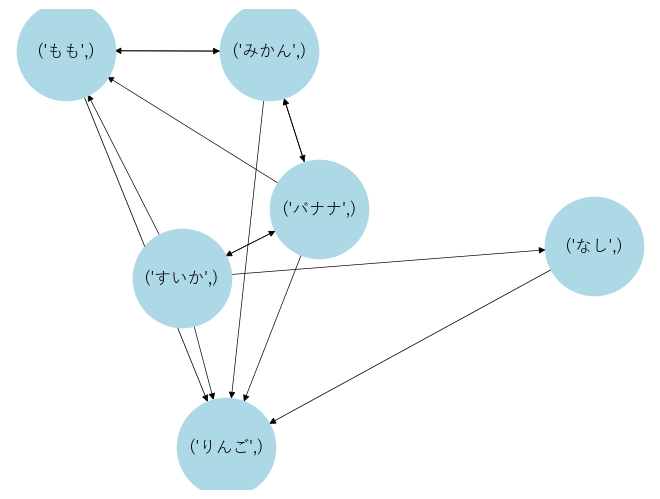

<Figure size 500x500 with 0 Axes>

In [198]:
pos = nx.spring_layout(G, weight="weight",seed = 0, k=1)
weights = [w["weight"] for (_,_,w) in G.edges(data=True)]
# グラフを描画

nx.draw(
    G, pos,
    node_color="lightblue",
    node_size=5000,
    edge_color="black",
    width=weights*10000000,  # 重みをエッジの太さに反映
)
nx.draw_networkx_labels(G, pos,
                        font_family="Yu Gothic")
plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 10
plt.figure(figsize=(5, 5))
plt.show()